In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, fftshift, ifft2
from skimage.util import random_noise

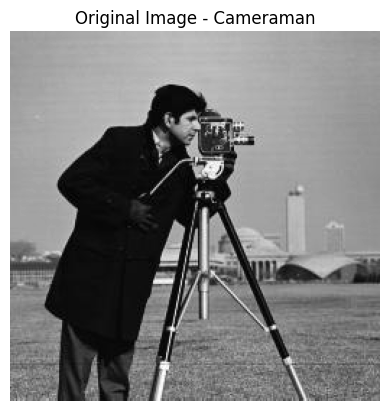

In [2]:
image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Original Image - Cameraman")
plt.axis('off')
plt.show()

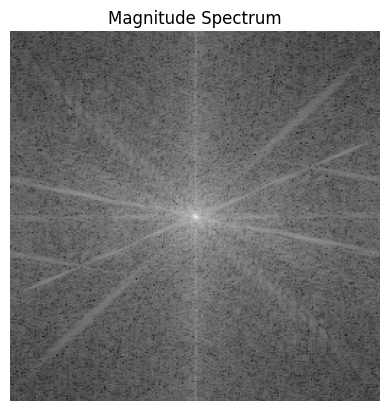

In [3]:
# Apply 2D DFT and shift
f_transform = fftshift(fft2(image))
magnitude_spectrum = np.log(np.abs(f_transform) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()

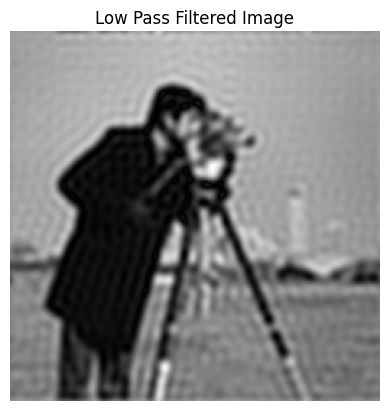

In [4]:
# Apply Low Pass Filter
def low_pass_filter(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            if np.sqrt((u - crow)**2 + (v - ccol)**2) <= radius:
                mask[u, v] = 1
    return mask

lp_mask = low_pass_filter(image.shape, 30)
filtered_lp = f_transform * lp_mask
image_lp = np.abs(ifft2(fftshift(filtered_lp)))

plt.imshow(image_lp, cmap='gray')
plt.title("Low Pass Filtered Image")
plt.axis('off')
plt.show()


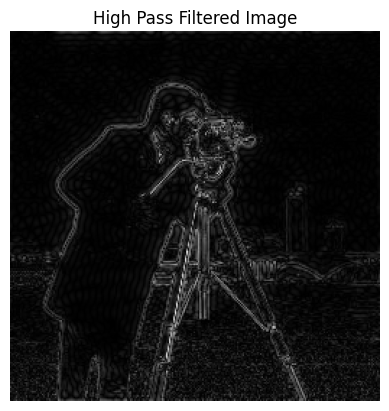

In [5]:
# Apply High Mask Filter
hp_mask = 1 - lp_mask
filtered_hp = f_transform * hp_mask
image_hp = np.abs(ifft2(fftshift(filtered_hp)))

plt.imshow(image_hp, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis('off')
plt.show()


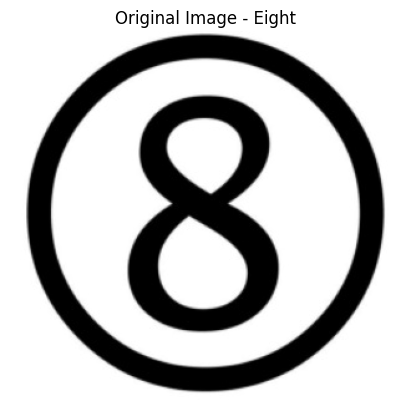

In [6]:
eight = cv2.imread('eight.jpg', cv2.IMREAD_GRAYSCALE)


plt.imshow(eight, cmap='gray')
plt.title("Original Image - Eight")
plt.axis('off')
plt.show()

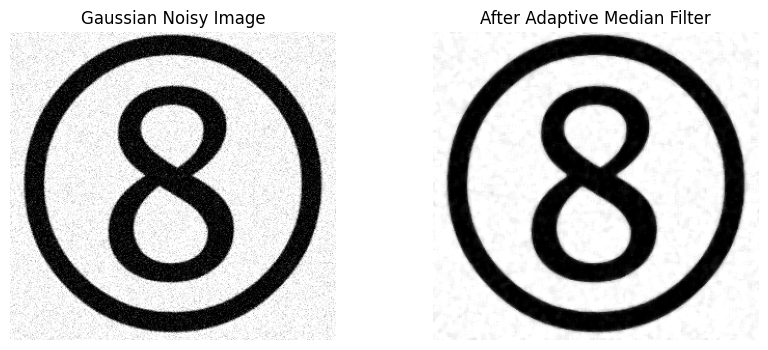

In [7]:
# Add Gausian Noise and Apply Adaptive Mean Filter
gaussian_noisy = random_noise(eight, mode='gaussian', var=0.01)

adaptive_filtered = cv2.medianBlur((gaussian_noisy * 255).astype(np.uint8), 5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(adaptive_filtered, cmap='gray')
plt.title("After Adaptive Median Filter")
plt.axis('off')
plt.show()


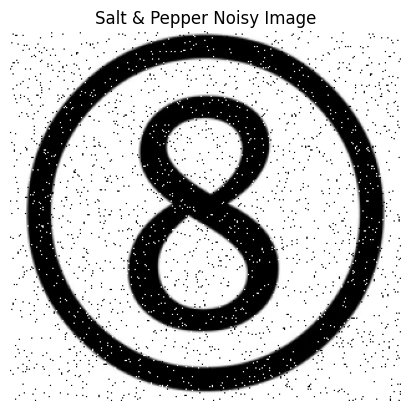

In [8]:
# Add Salt and Pepper Noise
sp_noisy = random_noise(eight, mode='s&p', amount=0.05)

plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt & Pepper Noisy Image")
plt.axis('off')
plt.show()

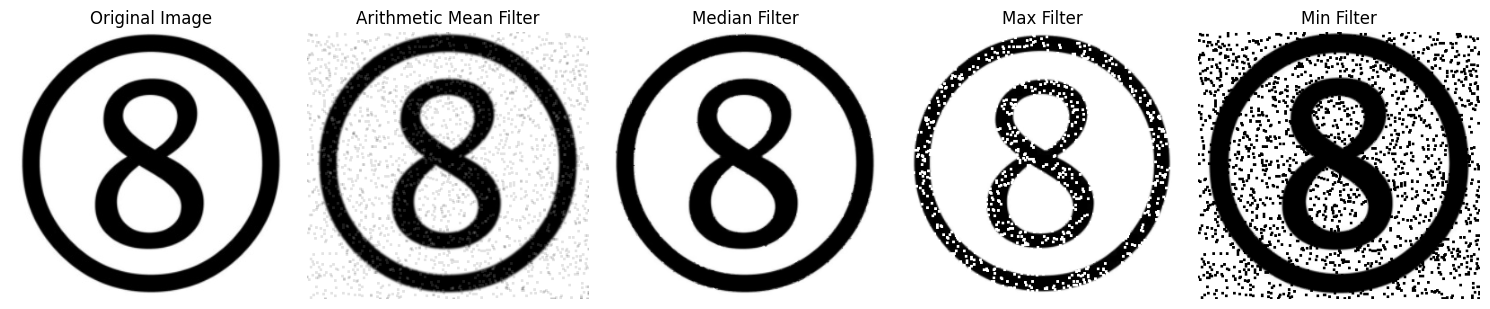

In [9]:
# Apply Median, Max, Min
from scipy.ndimage import uniform_filter, median_filter, maximum_filter, minimum_filter

mean_filtered = uniform_filter(sp_noisy, size=3)
median_f = median_filter(sp_noisy, size=3)
max_f = maximum_filter(sp_noisy, size=3)
min_f = minimum_filter(sp_noisy, size=3)

fig, axs = plt.subplots(1, 5, figsize=(15, 4))

axs[0].imshow(eight, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mean_filtered, cmap='gray')
axs[1].set_title("Arithmetic Mean Filter")
axs[1].axis('off')

axs[2].imshow(median_f, cmap='gray')
axs[2].set_title("Median Filter")
axs[2].axis('off')

axs[3].imshow(max_f, cmap='gray')
axs[3].set_title("Max Filter")
axs[3].axis('off')

axs[4].imshow(min_f, cmap='gray')
axs[4].set_title("Min Filter")
axs[4].axis('off')

plt.tight_layout()
plt.show()
